In [1]:
!pip install gdown -q

In [2]:
import gdown

output = "nifty.csv"
url = "https://drive.google.com/file/d/1kI7vnsPB46Z2grGq9GSaUCaQ3Y1ekI9a/view?usp=sharing"
gdown.download(url=url, output=output, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1kI7vnsPB46Z2grGq9GSaUCaQ3Y1ekI9a
To: /kaggle/working/nifty.csv
100%|██████████| 528k/528k [00:00<00:00, 82.9MB/s]


'nifty.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/working/nifty.csv')
df.head()

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,05 Jul 2024,24213.35,24363,24168.85,24323.85
1,NIFTY 50,04 Jul 2024,24369.95,24401,24281,24302.15
2,NIFTY 50,03 Jul 2024,24291.75,24309.15,24207.1,24286.50
3,NIFTY 50,02 Jul 2024,24228.75,24236.35,24056.4,24123.85
4,NIFTY 50,01 Jul 2024,23992.95,24164,23992.7,24141.95


In [5]:
df.drop(columns=['Index Name', 'Open', 'High', 'Low'], inplace=True)
df.head()

,Date,Close
0,05 Jul 2024,24323.85
1,04 Jul 2024,24302.15
2,03 Jul 2024,24286.50
3,02 Jul 2024,24123.85
4,01 Jul 2024,24141.95


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Close
0,2024-07-05,24323.85
1,2024-07-04,24302.15
2,2024-07-03,24286.50
3,2024-07-02,24123.85
4,2024-07-01,24141.95


In [7]:
start_date = '1990-07-03'
# end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
end_date = '2024-07-07'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

In [8]:
date_df = pd.DataFrame(date_range, columns=['Date'])
date_df.head()

,Date
0,1990-07-03
1,1990-07-04
2,1990-07-05
3,1990-07-06
4,1990-07-07


In [9]:
df = pd.merge(date_df, df, how='left', on='Date')
df.head()

,Date,Close
0,1990-07-03,279.02
1,1990-07-04,NaN
2,1990-07-05,284.04
3,1990-07-06,289.04
4,1990-07-07,NaN


In [10]:
df.isna().sum()

Date        0
Close    4166
dtype: int64

In [11]:
df = df.ffill()

In [12]:
# df.set_index('Date', inplace=True)

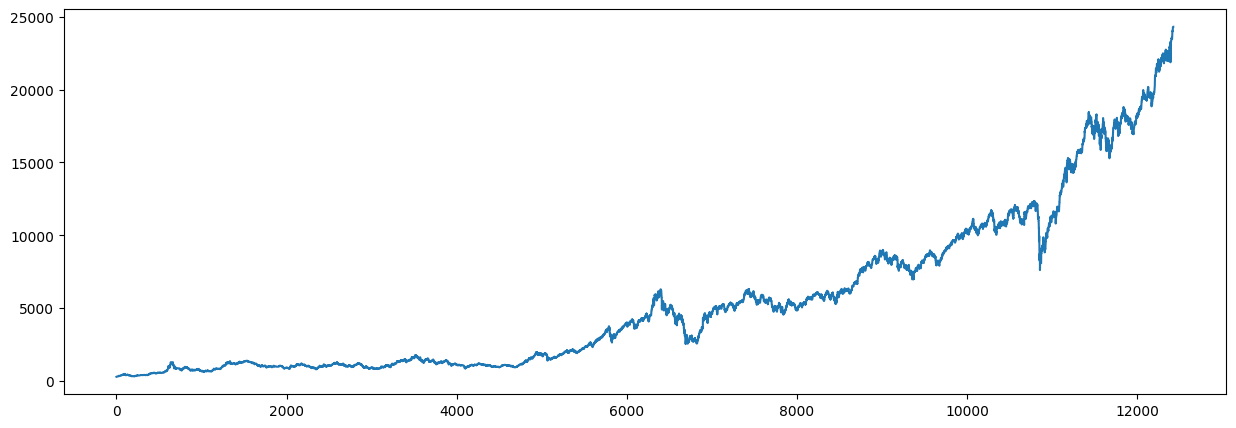

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(df.index.values, df['Close'])
plt.show()

In [14]:
df['Close%'] = ((df['Close'] / df['Close'].shift(1)) - 1) * 100
df['Close_1D_ago'] = df['Close%'].shift(1)
df['Close_2D_ago'] = df['Close%'].shift(2)
df['Close_3D_ago'] = df['Close%'].shift(3)
df['Close_1W_ago'] = df['Close%'].shift(7)
df['Close_2W_ago'] = df['Close%'].shift(14)
df['Close_1M_ago'] = df['Close%'].shift(30)
df['Close_2M_ago'] = df['Close%'].shift(60)
df['Close_3M_ago'] = df['Close%'].shift(90)
df['Close_6M_ago'] = df['Close%'].shift(180)
df['Close_1Y_ago'] = df['Close%'].shift(365)
df['Close_2Y_ago'] = df['Close%'].shift(930)
df['Close_3Y_ago'] = df['Close%'].shift(1095)
df['Close_5Y_ago'] = df['Close%'].shift(1825)
df['Close_7Y_ago'] = df['Close%'].shift(2555)
df['Close_10Y_ago'] = df['Close%'].shift(3650)
df.dropna(inplace=True)
# df['Close%'] = (df['Close'] / df['Close'].shift(1) - 1) * 100
# df.fillna(0, inplace=True)

In [15]:
df.head()

,Date,Close,Close%,Close_1D_ago,Close_2D_ago,Close_3D_ago,Close_1W_ago,Close_2W_ago,Close_1M_ago,Close_2M_ago,Close_3M_ago,Close_6M_ago,Close_1Y_ago,Close_2Y_ago,Close_3Y_ago,Close_5Y_ago,Close_7Y_ago,Close_10Y_ago
3651,2000-07-01,1471.45,0.000000,-1.400476,1.520408,1.079557,0.000000,0.000000,-2.278243,-5.197114,0.000000,7.548381,1.238168,0.000000,1.874297,-2.364679,0.000000,0.000000
3652,2000-07-02,1471.45,0.000000,0.000000,-1.400476,1.520408,0.000000,0.000000,2.983692,-1.304886,0.412182,2.920487,0.000000,1.523079,-0.658244,-0.607352,0.000000,1.799154
3653,2000-07-03,1495.25,1.617452,0.000000,0.000000,-1.400476,-1.395870,1.451973,0.000000,4.901030,-6.949014,-2.617929,0.000000,2.296270,0.098774,-0.157590,0.901790,1.760315
3654,2000-07-04,1511.30,1.073399,1.617452,0.000000,0.000000,0.182551,0.557131,0.000000,3.031401,0.458651,1.366086,2.704846,1.077468,0.000000,0.142807,0.137839,0.000000
3655,2000-07-05,1526.05,0.975981,1.073399,1.617452,0.000000,1.079557,-2.119965,1.104913,0.000000,1.275572,-0.265826,0.894127,-0.340522,0.000000,0.793430,-0.153930,0.000000


In [16]:
df.reset_index(drop=True, inplace=True)
df.set_index(df['Date'], inplace=True)
df.drop(columns=['Date'], inplace=True)
df.head()

,Close,Close%,Close_1D_ago,Close_2D_ago,Close_3D_ago,Close_1W_ago,Close_2W_ago,Close_1M_ago,Close_2M_ago,Close_3M_ago,Close_6M_ago,Close_1Y_ago,Close_2Y_ago,Close_3Y_ago,Close_5Y_ago,Close_7Y_ago,Close_10Y_ago
Date,,,,,,,,,,,,,,,,,
2000-07-01,1471.45,0.000000,-1.400476,1.520408,1.079557,0.000000,0.000000,-2.278243,-5.197114,0.000000,7.548381,1.238168,0.000000,1.874297,-2.364679,0.000000,0.000000
2000-07-02,1471.45,0.000000,0.000000,-1.400476,1.520408,0.000000,0.000000,2.983692,-1.304886,0.412182,2.920487,0.000000,1.523079,-0.658244,-0.607352,0.000000,1.799154
2000-07-03,1495.25,1.617452,0.000000,0.000000,-1.400476,-1.395870,1.451973,0.000000,4.901030,-6.949014,-2.617929,0.000000,2.296270,0.098774,-0.157590,0.901790,1.760315
2000-07-04,1511.30,1.073399,1.617452,0.000000,0.000000,0.182551,0.557131,0.000000,3.031401,0.458651,1.366086,2.704846,1.077468,0.000000,0.142807,0.137839,0.000000
2000-07-05,1526.05,0.975981,1.073399,1.617452,0.000000,1.079557,-2.119965,1.104913,0.000000,1.275572,-0.265826,0.894127,-0.340522,0.000000,0.793430,-0.153930,0.000000


In [17]:
close_df = df['Close']
df.drop(columns=['Close'], inplace=True)

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to scale
numerical_columns = df.columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns, index=df.index)

df_scaled.head()

,Close%,Close_1D_ago,Close_2D_ago,Close_3D_ago,Close_1W_ago,Close_2W_ago,Close_1M_ago,Close_2M_ago,Close_3M_ago,Close_6M_ago,Close_1Y_ago,Close_2Y_ago,Close_3Y_ago,Close_5Y_ago,Close_7Y_ago,Close_10Y_ago
Date,,,,,,,,,,,,,,,,
2000-07-01,0.422479,0.376897,0.471964,0.457616,0.422479,0.422479,0.348328,0.253327,0.422479,0.668158,0.462778,0.422479,0.483482,0.329302,0.408172,0.408172
2000-07-02,0.422479,0.422479,0.376897,0.471964,0.422479,0.422479,0.519590,0.380008,0.435894,0.517533,0.422479,0.472051,0.401055,0.387915,0.408172,0.468180
2000-07-03,0.475123,0.422479,0.422479,0.376897,0.377047,0.469737,0.422479,0.581994,0.196307,0.337272,0.422479,0.497216,0.425694,0.402916,0.438250,0.466885
2000-07-04,0.457415,0.475123,0.422479,0.422479,0.428420,0.440612,0.422479,0.521143,0.437407,0.466941,0.510514,0.457548,0.422479,0.412935,0.412770,0.408172
2000-07-05,0.454244,0.457415,0.475123,0.422479,0.457616,0.353480,0.458441,0.422479,0.463995,0.413827,0.451580,0.411396,0.422479,0.434636,0.403038,0.408172


In [19]:
df.shape

(8773, 16)

In [20]:
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i: i + time_steps, 1:].values)
        y.append(data.iloc[i, 0])
    return np.array(X), np.array(y)

In [21]:
time_steps = 60
X, y = create_sequences(df_scaled, time_steps)

In [22]:
dates = df.index.values

In [23]:
train_len = 0.8
val_len = 0.1
test_len = 0.1

In [24]:
training_data_len = int(np.ceil(y.shape[0] * train_len))
val_data_len = int(np.ceil(y.shape[0] * (train_len + val_len)))

training_data_len, val_data_len

(6971, 7842)

In [25]:
dates_r = dates[time_steps:]
dates_train = dates_r[:training_data_len]
dates_val = dates_r[training_data_len:val_data_len]
dates_test = dates_r[val_data_len:]

X_train = X[:training_data_len]
X_val = X[training_data_len: val_data_len]
X_test = X[val_data_len:]

y_train = y[:training_data_len]
y_val = y[training_data_len:val_data_len]
y_test = y[val_data_len:]

In [26]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape, dates_train.shape, dates_val.shape, dates_test.shape

((6971, 60, 15),
 (871, 60, 15),
 (871, 60, 15),
 (6971,),
 (871,),
 (871,),
 (6971,),
 (871,),
 (871,))

In [27]:
import tensorflow as tf

2024-07-12 07:48:32.642830: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 07:48:32.642928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 07:48:32.777824: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((time_steps, 15)),
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.GRU(128, return_sequences=False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 60, 128)        │        55,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,393 (669.50 KB)

 Trainable params: 171,393 (669.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [31]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/300
218/218 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 2/300
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 3/300
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 4/300
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 5/300
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 6/300
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 7/300
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0015 - mean_squared_error: 0.0015 -

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 60, 128)        │        55,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,181 (1.96 MB)

 Trainable params: 171,393 (669.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 342,788 (1.31 MB)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def prediction(model, X, y, dates):
    y_pred = model.predict(X).flatten()

    plt.figure(figsize=(15, 5))
    plt.plot(dates, y)
    plt.plot(dates, y_pred)
    plt.legend(['y-true', 'y-pred'])
    plt.show()
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y, y_pred)
    print(f'Mean Absolute Error: {mae}')

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_pred)
    print(f'Mean Squared Error: {mse}')

    # Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(y, y_pred, squared=False)
    print(f'Root Mean Squared Error: {rmse}')

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100
    print(f'Mean Absolute Percentage Error: {mape}')

    # R-squared (R²)
    r2 = r2_score(y, y_pred)
    print(f'R-squared: {r2}')

218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


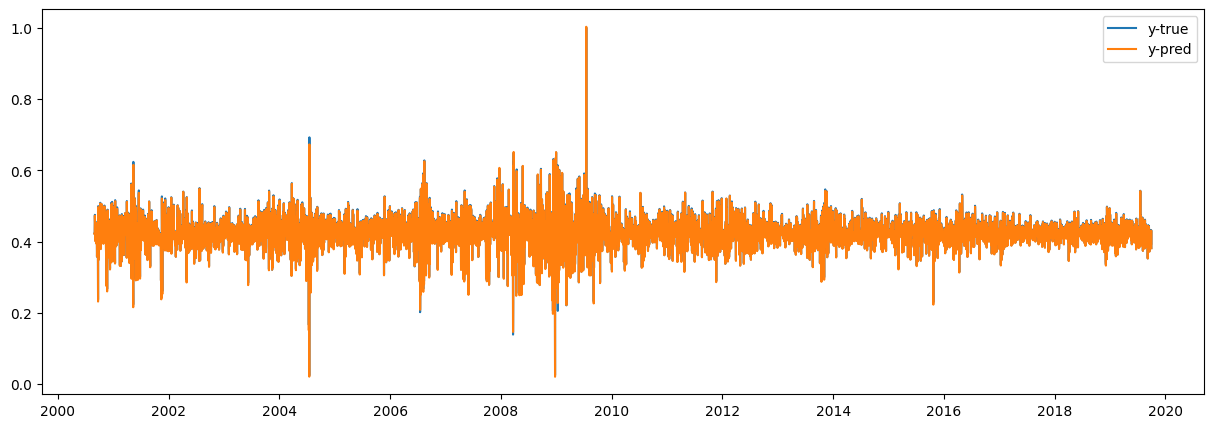

Mean Absolute Error: 0.001866842414135195
Mean Squared Error: 4.5137406382397534e-06
Root Mean Squared Error: 0.0021245565744973122
Mean Absolute Percentage Error: 0.4479244804433875
R-squared: 0.9968260414149899


In [34]:
prediction(model, X_train, y_train, dates_train)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


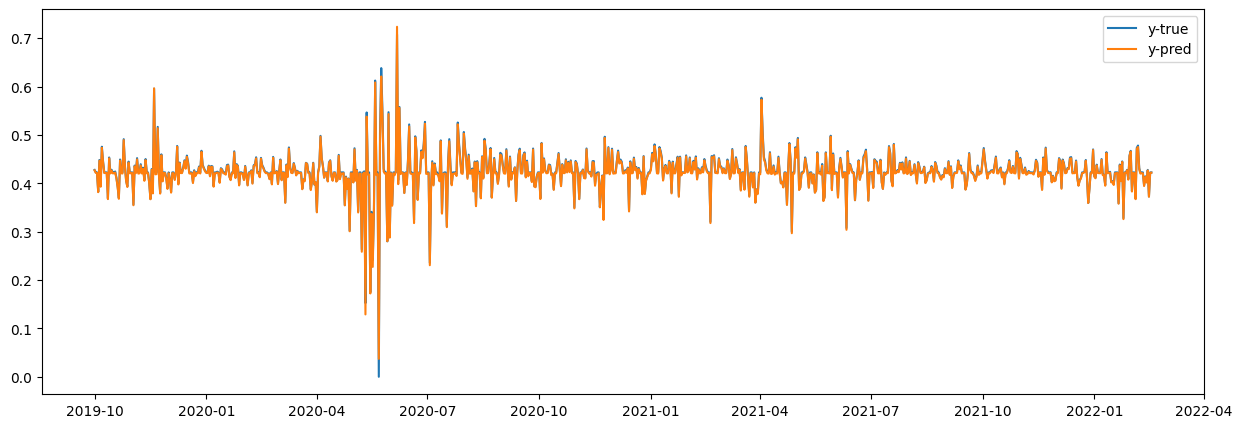

Mean Absolute Error: 0.0020352049108425577
Mean Squared Error: 8.094342675752343e-06
Root Mean Squared Error: 0.002845055829988639
Mean Absolute Percentage Error: inf
R-squared: 0.9948707633723627


/tmp/ipykernel_34/2253997882.py:25: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y - y_pred) / y)) * 100


In [35]:
prediction(model, X_val, y_val, dates_val)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


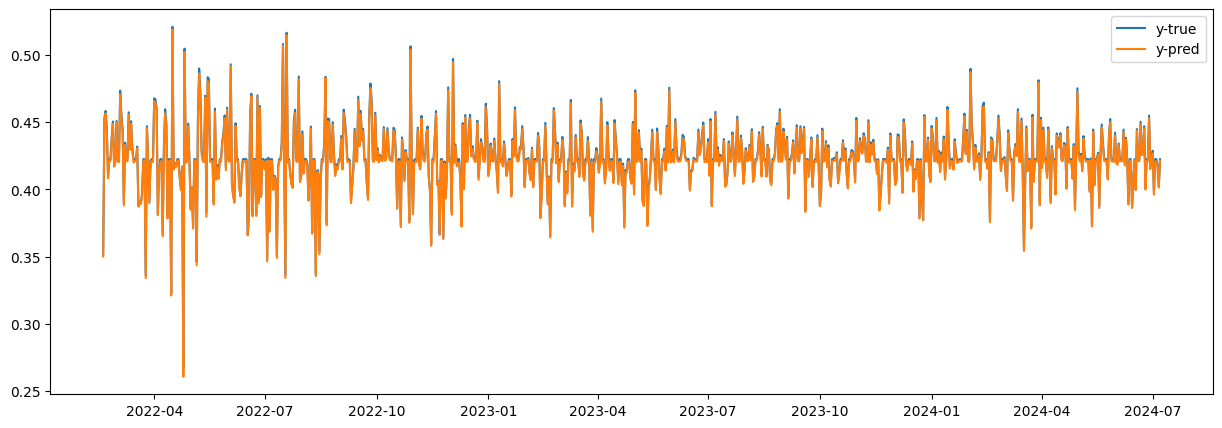

Mean Absolute Error: 0.0016654215837834806
Mean Squared Error: 3.043991223355641e-06
Root Mean Squared Error: 0.0017447037637821617
Mean Absolute Percentage Error: 0.3923565365274305
R-squared: 0.9943263312180544


In [36]:
prediction(model, X_test, y_test, dates_test)

In [37]:
def create_features(df, pred):
    
    df = df['Close%']
    # Add a new row of data
    new_date = pd.date_range(df.index[-1] + pd.DateOffset(days=1), periods=1, freq='D')
    new_close_value = pred

    # Append the new row to the DataFrame
    new_row = pd.DataFrame({'Close%': new_close_value}, index=[pd.to_datetime(new_date.values[0])])
    df = pd.concat([df, new_row])

    df['Close_1D_ago'] = df['Close%'].shift(1)
    df['Close_2D_ago'] = df['Close%'].shift(2)
    df['Close_3D_ago'] = df['Close%'].shift(3)
    df['Close_1W_ago'] = df['Close%'].shift(7)
    df['Close_2W_ago'] = df['Close%'].shift(14)
    df['Close_1M_ago'] = df['Close%'].shift(30)
    df['Close_2M_ago'] = df['Close%'].shift(60)
    df['Close_3M_ago'] = df['Close%'].shift(90)
    df['Close_6M_ago'] = df['Close%'].shift(180)
    df['Close_1Y_ago'] = df['Close%'].shift(365)
    df['Close_2Y_ago'] = df['Close%'].shift(930)
    df['Close_3Y_ago'] = df['Close%'].shift(1095)
    df['Close_5Y_ago'] = df['Close%'].shift(1825)
    df['Close_7Y_ago'] = df['Close%'].shift(2555)
    df['Close_10Y_ago'] = df['Close%'].shift(3650)
    
    return df

In [38]:
# Number of future steps to forecast
future_steps = 25

# Placeholder for predictions
future_predictions = []

# Start with the last available row of features
last_row = X[-1:]

df_forecast = df_scaled.copy()

for step in range(future_steps):
    
#     Predict the next value
    next_close = model.predict(last_row)
    
#     Add the prediction to the list
    future_predictions.append(next_close[0, 0])
    
    # Create the new row with lagged features
    df_forecast = create_features(df_forecast, next_close[0, 0])
    last_row = df_forecast.iloc[-60:, 1:].values.reshape(1, time_steps, 15)

predicted_prices = np.array(future_predictions).reshape(-1, 1)
predicted_full_features = np.concatenate((predicted_prices, np.zeros((future_steps, 15))), axis=1)
predicted_values = scaler.inverse_transform(predicted_full_features)[:, 0]
predicted_values_list = predicted_values.flatten().tolist()

last_close = close_df.values[-1]

future_closes = []

for i in range(predicted_values_list.__len__()):
    next_close = last_close * (1 + (predicted_values_list[i] / 100))
    future_closes.append(next_close)
    next_close = last_close

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


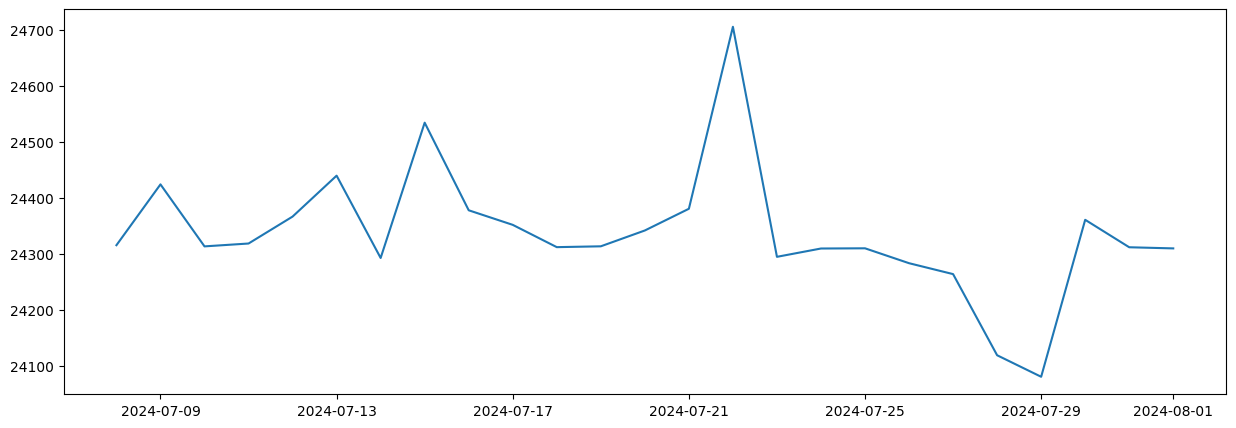

In [39]:
# Create a DataFrame for future predictions
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=future_steps, freq='D')
future_df = pd.DataFrame(future_closes, index=future_dates, columns=['Close'])

plt.figure(figsize=(15, 5))
plt.plot(future_dates, future_df)
plt.show()

In [40]:
future_df

,Close
2024-07-08,24315.577616
2024-07-09,24424.005614
2024-07-10,24313.477326
2024-07-11,24318.584395
2024-07-12,24366.587948
2024-07-13,24439.545760
2024-07-14,24292.799153
2024-07-15,24533.987560
2024-07-16,24377.821719
2024-07-17,24351.849165


In [41]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
r2_scores = []

i = 1

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model_cv = model
    model_cv.fit(X_train, y_train, epochs=300, batch_size=32, callbacks=[early_stop], verbose=0)

    y_pred = model_cv.predict(X_test)
    y_pred = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((y_pred.shape[0], df_scaled.shape[1] - 1))), axis=1))[:, 0]

    y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], df_scaled.shape[1] - 1))), axis=1))[:, 0]

    r2 = r2_score(y_test_original, y_pred)
    r2_scores.append(r2)
    
    print(i, r2)
    i += 1

print(f'Cross-validated R² scores: {r2_scores}')
print(f'Mean R² score: {np.mean(r2_scores)}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1 0.990825907585343
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2 0.9945685099125318
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
3 0.9984765548814698
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
4 0.9978877982894672
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
5 0.9965472571473544
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
6 0.9975383576428356
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
7 0.99800185014661
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
8 0.9927655523157164
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
9 0.9967315318775692
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10 0.9983706645366562
Cross-validated R² scores: [0.990825907585343, 0.9945685099125318, 0.9984765548814698, 0.9978877982894672, 0.9965472571473544, 0.9975383576428356, 0.99800185014661, 0.9927655523157164, 0.9967315318775692, 0.9983706645366562]
Mean R² score: 0.9961713984335555


273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


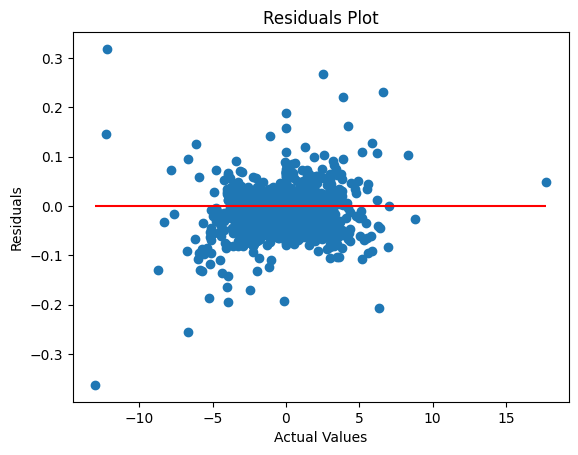

In [42]:
# Predict on the entire dataset for residual plot
# model.fit(X, y, epochs=50, batch_size=32, verbose=0)
y_pred_all = model_cv.predict(X)
y_pred_all = scaler.inverse_transform(np.concatenate((y_pred_all, np.zeros((y_pred_all.shape[0], df_scaled.shape[1] - 1))), axis=1))[:, 0]
y_all_original = scaler.inverse_transform(np.concatenate((y.reshape(-1, 1), np.zeros((y.shape[0], df_scaled.shape[1] - 1))), axis=1))[:, 0]

# Residuals plot
plt.scatter(y_all_original, y_all_original - y_pred_all)
plt.hlines(y=0, xmin=min(y_all_original), xmax=max(y_all_original), colors='r')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

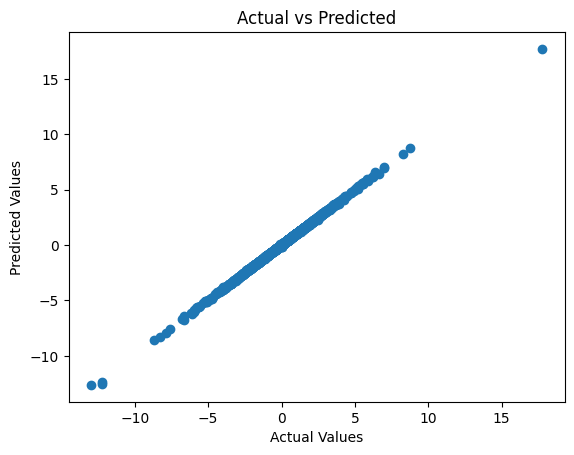

In [43]:
plt.scatter(y_all_original, y_pred_all)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [44]:
model.save("nifty_model.keras")